<a href="https://colab.research.google.com/github/Common-diseases-Health-Research/CVDScreener/blob/main/CVD_risk_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To dos:
- add column names into cvd_patient_data DataFrame ✅

- perform normalization on cols [ minmax on cols with highly varied values]

- perform one-hot vector encoding on prediction col [#58]

- figure out ANN code [ refer: Github codebook, neural network cheatbook{ML and DL resource}

- train 3 ANNs:

Model_1: hidden layer 1, Adam.

Model_2: hidden layer 2, Adam, Relu, epoch=20.

Model_3: hidden layer, Adam, Softmax, epoch=100

1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

-  Mulit-class (#58)
it is better to use ANN as there is no image data
- Train ANN
    - 1st option 80% train 20% test
    - 2nd option k-fold
- For multi-class prediction
    - `Use one-hot vector(need to find) to represent multiclass`
    - activation = softmax (o/p layer)
    - hidden layers activiation function= test and compare results with ReLu and Sigmoid
    - optimizer = Adam (set lr) and SGD
      - batch learning [ half batch and full batch]
    - Epochs= 50 or 100
    - metrics = compare precison,recall vs F1-score

`Model_1`: 1 hidden layer, Adam, Relu, softmax epoch=10

`Model_2`: 2 hidden layer, epoch=20

`Model_3`: 4 hidden layer epoch=100



# import libraries

In [ ]:
# cleveland data only
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# reading data
cvd_patient_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",sep=',')
cvd_patient_data.columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","CVDriskindicator"]


# using pandas to deal with invalid values and data type in column ca and thal


In [ ]:
cvd_patient_data.dtypes

age                 float64
sex                 float64
cp                  float64
trestbps            float64
chol                float64
fbs                 float64
restecg             float64
thalach             float64
exang               float64
oldpeak             float64
slope               float64
ca                   object
thal                 object
CVDriskindicator      int64
dtype: object

In [ ]:
# drop '?' rows
ca_data, thatl_data = cvd_patient_data[['ca','thal']]


In [ ]:
cvd_patient_data[['ca','thal']] = cvd_patient_data[['ca','thal']].replace(to_replace='?',value=-1)

In [ ]:
# working
cvd_patient_data[['ca','thal']]=cvd_patient_data[['ca','thal']].apply(pd.to_numeric)
print(cvd_patient_data.dtypes)

age                 float64
sex                 float64
cp                  float64
trestbps            float64
chol                float64
fbs                 float64
restecg             float64
thalach             float64
exang               float64
oldpeak             float64
slope               float64
ca                  float64
thal                float64
CVDriskindicator      int64
dtype: object


In [ ]:
# testing 10/24
pd.to_numeric(cvd_patient_data,downcast=tf.float32)
print(cvd_patient_data.dtypes)

TypeError: ignored

In [ ]:
# replace -1 in 'ca' and 'thal' with mean.value of repsective col
ca_mean = cvd_patient_data['ca'].mean()
ca_mean = ca_mean.round()
ca_mean

1.0

In [ ]:
# replace -1 in 'ca' and 'thal' with mean.value of repsective col
thal_mean = cvd_patient_data['thal'].mean()
thal_mean = thal_mean.round()
thal_mean

5.0

*Note:* 
* replacing -1 in 'ca' with mean(0.65) rounded to 1
* replace -1 in 'thal' with mean(4.69) rounded to 5


In [ ]:
cvd_patient_data['ca'] = cvd_patient_data['ca'].replace(to_replace=-1,value=ca_mean)

In [ ]:
cvd_patient_data['thal'] = cvd_patient_data['thal'].replace(to_replace=-1,value=thal_mean)

In [ ]:
# fixed 'ca' nd 'thal'
tf.cast(cvd_patient_data,tf.float32)
cvd_patient_data.dtypes

age                 float64
sex                 float64
cp                  float64
trestbps            float64
chol                float64
fbs                 float64
restecg             float64
thalach             float64
exang               float64
oldpeak             float64
slope               float64
ca                  float64
thal                float64
CVDriskindicator      int64
dtype: object

In [ ]:
cvd_patient_data['CVDriskindicator'].value_counts()

0    163
1     55
2     36
3     35
4     13
Name: CVDriskindicator, dtype: int64

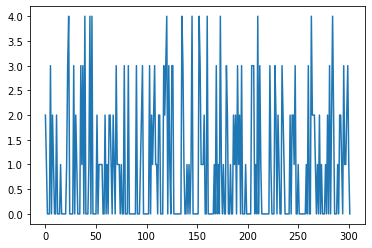

In [ ]:
cvd_patient_data["CVDriskindicator"].plot()

In [ ]:
cvd_patient_data['age'].value_counts()

58.0    18
57.0    17
54.0    16
59.0    14
60.0    12
51.0    12
56.0    11
62.0    11
44.0    11
52.0    11
64.0    10
41.0    10
67.0     9
42.0     8
45.0     8
63.0     8
55.0     8
61.0     8
65.0     8
50.0     7
66.0     7
43.0     7
46.0     7
53.0     7
48.0     7
47.0     5
49.0     5
35.0     4
70.0     4
68.0     4
39.0     4
69.0     3
71.0     3
40.0     3
34.0     2
37.0     2
29.0     1
77.0     1
38.0     1
74.0     1
76.0     1
Name: age, dtype: int64

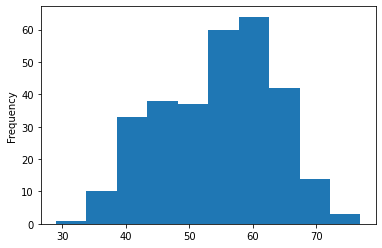

In [ ]:
# visualzing cols 
cvd_patient_data["age"].plot(kind="hist");

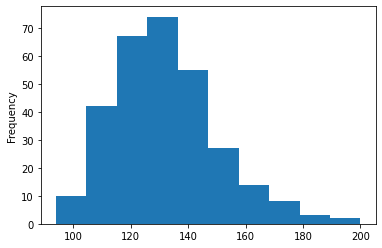

In [ ]:
# visualizng predictor variable 
cvd_patient_data["trestbps"].plot(kind="hist")

- Find dataset statitics using pandas (refer Data Mining class projects)
- Find clear histogram with trend line

In [ ]:
cvd_patient_data = cvd_patient_data.values
cvd_patient_data

array([[67.,  1.,  4., ...,  3.,  3.,  2.],
       [67.,  1.,  4., ...,  2.,  7.,  1.],
       [37.,  1.,  3., ...,  0.,  3.,  0.],
       ...,
       [57.,  1.,  4., ...,  1.,  7.,  3.],
       [57.,  0.,  2., ...,  1.,  3.,  1.],
       [38.,  1.,  3., ...,  1.,  3.,  0.]])

[col: 'favorite fruit']
[0,1,3,4,5] =
 [[0,1,0,0], [1,0,0,0]



# Define purpose of applying vector encoding on predictor variable
- **skelearn OneHotEncoder** > will not work as it does not support depth variable in order to assign categories (in this case: severity of CVD risk)
- **tf.one_hot** > support depth to assign categories

In [ ]:
#np.dtype(tf_one_hot_encode(cvd_patient_data["CVD_risk_indicator",5]))
tf.one_hot(cvd_patient_data["CVDriskindicator"],depth=5)

<tf.Tensor: shape=(302, 5), dtype=float32, numpy=
array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)>

## create X and y
from sklearn.model_selection import train_test_split
X = cvd_patient_data.drop("CVDriskindicator",axis=1)
y = tf.one_hot(cvd_patient_data["CVDriskindicator"],depth=5).numpy()


# Create train nd test data (using nd numpy array)

## Questions:
- `class labels`: does predictor variable `y` need class labels?
  * `sklearn onehotencoder()` require 2d-array.
  * Is it safe to apply `one_hot` encoding before defining class labels?


Below pic is from: sklearn onehotencoder page #6.3.4
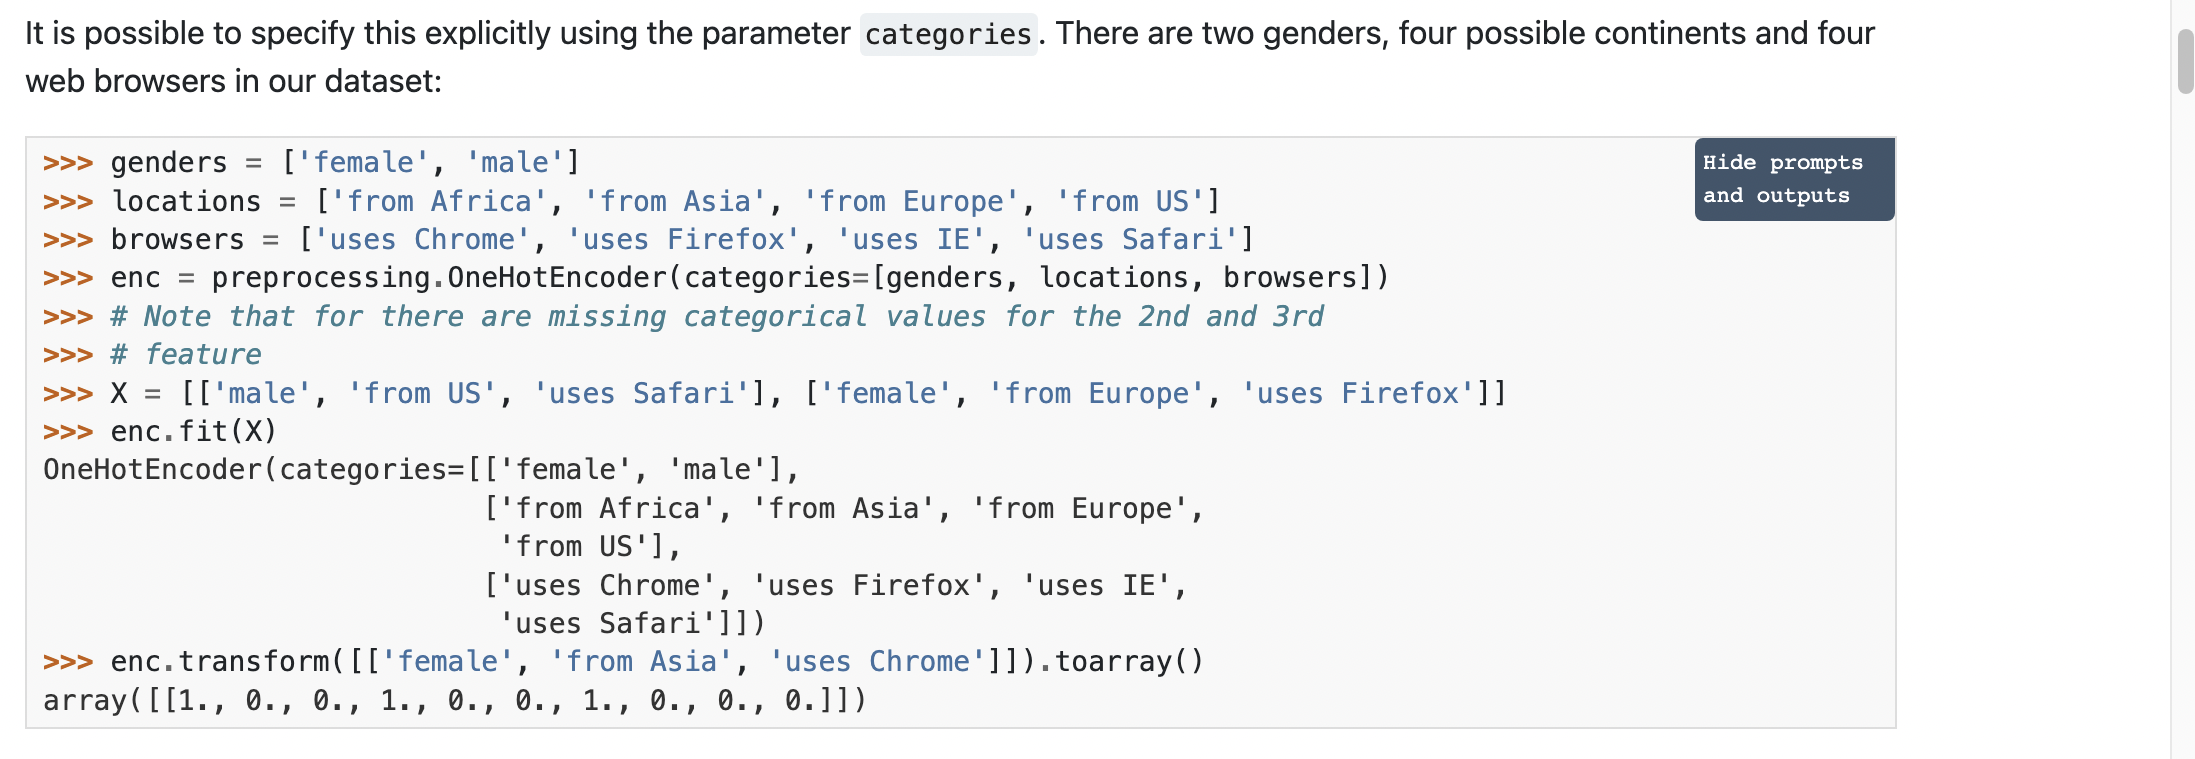

Considering above example:

* severity could be: 0 = level_0, 1 = level_1, 2 = level_2, 3 = level_3, 4=level_4
* class lablel => `CVDseverity = ['level_0', 'level_1', 'level_2','level_3', 'level_4']`

- Check with project team if below concept would be helpful in traning model for defining labels for output

In [ ]:
# onehotencode check
CVDseverity = ['level_0', 'level_1', 'level_2','level_3', 'level_4']
ohe = OneHotEncoder(categories=[CVDseverity])
ohe = OneHotEncoder()
y_pred = y.reshape(-1,1)
y_onehot = ohe.fit_transform(y_pred) # require 2d-array y shape =(302,)
y_onehot.shape,y_onehot.toarray()


In [ ]:
# minmax
from sklearn.preprocessing import MinMaxScaler
mnx = MinMaxScaler()
X_mnx = mnx.fit_transform(X)
X_mnx.shape

# Preparing data for neural classification

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create X and y
# Create X and y
X = cvd_patient_data[:,0:13] # [all rows, cols 0th-13th]
y = cvd_patient_data[:,-1] # [all rows, col 14th]

#X = df.iloc[:,1:15] #independent var
#y = df['Weir']

# minmax
mnx = MinMaxScaler()
X = mnx.fit_transform(X)
# onehotencode
ohe = OneHotEncoder()
y_pred = ohe.fit_transform(y.reshape(-1,1)).toarray() # require 2d-array

# return type for y should be "numpy array"

# Create train nd test data
X_train, X_test, y_train, y_test = train_test_split(X,y_pred,test_size=0.2,random_state=42)


In [ ]:
y_pred

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
X_train.shape, y_train.shape

((241, 13), (241, 5))

In [ ]:
len(X), len(X_train), len(X_test)

(302, 241, 61)

In [ ]:
y_pred.shape

(302, 5)

In [ ]:
pd.DataFrame(X_train[0:11,0:13])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.458333,1.0,1.000000,0.433962,0.308219,0.0,1.0,0.877863,1.0,0.000000,0.0,0.000000,0.00
1,0.729167,0.0,0.666667,0.433962,0.426941,0.0,0.0,0.473282,0.0,0.032258,0.0,0.000000,1.00
2,0.333333,0.0,1.000000,0.415094,0.251142,0.0,1.0,0.618321,1.0,0.032258,0.5,0.000000,0.00
3,0.645833,1.0,1.000000,0.292453,0.301370,0.0,1.0,0.534351,1.0,0.451613,0.5,0.333333,1.00
4,0.562500,1.0,1.000000,0.358491,0.132420,0.0,1.0,0.259542,1.0,0.338710,0.5,0.333333,0.75
5,0.458333,0.0,1.000000,0.339623,0.408676,0.0,0.0,0.541985,1.0,0.193548,0.5,0.000000,1.00
6,0.708333,0.0,0.666667,0.386792,0.287671,0.0,1.0,0.770992,0.0,0.000000,0.0,0.000000,0.00
7,0.583333,0.0,1.000000,0.245283,0.520548,0.0,0.0,0.702290,1.0,0.096774,0.0,0.000000,0.00
8,0.291667,1.0,0.666667,0.339623,0.431507,0.0,0.0,0.694656,0.0,0.306452,0.0,0.333333,0.00
9,0.645833,1.0,1.000000,0.216981,0.237443,1.0,0.0,0.679389,1.0,0.225806,0.0,0.666667,1.00


# Training models:
`Model_1`: 1 hidden layer, Adam, Relu, softmax epoch=10

`Model_2`: 2 hidden layer, epoch=50

`Model_3`: 2 hidden layer, epoch=100


In [ ]:
# random seed
tf.random.set_seed(42)
# create model
m1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(5,activation="softmax")
])

# compile model
m1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# fit model
m1_norm_history = m1.fit(X_train,
                         y_train,
                         epochs=10)

Epoch 1/10
8/8 [==============================] - 1s 2ms/step - loss: 1.6533 - accuracy: 0.0913
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 1.6336 - accuracy: 0.0996
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 1.6140 - accuracy: 0.1494
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 1.5950 - accuracy: 0.1826
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 1.5777 - accuracy: 0.2282
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 1.5603 - accuracy: 0.2614
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 1.5434 - accuracy: 0.3361
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 1.5269 - accuracy: 0.3568
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 1.5104 - accuracy: 0.4232
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 1.4928 - accuracy: 0.4606


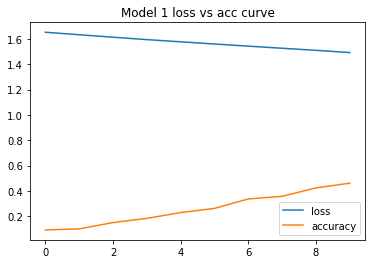

In [ ]:
pd.DataFrame(m1_norm_history.history).plot(title="Model 1 loss vs acc curve");

In [ ]:
# evaluate model 1
loss, accuracy = m1.evaluate(X_test, y_test)
print(f"Model loss on test set:{loss}")
print(f"Model acc on test set:{(accuracy*100):.2f}")
# checking predictions for model 5
m1_preds = m1.predict(X_test)

# converting model 5 predition probablities into correct format
m1_preds = m1_preds.argmax(axis=1)
m1_preds

2/2 [==============================] - 0s 5ms/step - loss: 1.5641 - accuracy: 0.3934
Model loss on test set:1.5640949010849
Model acc on test set:39.34
2/2 [==============================] - 0s 6ms/step


array([4, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

Model 2:
- added hidden layer (same # of units)
- epoch = 50

In [ ]:
# model 2
# random seed
tf.random.set_seed(42)
# create model
m2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(5,activation="softmax")
])

# compile model
m2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# fit model
m2_norm_history = m2.fit(X_train,
                         y_train,
                         epochs=50)

Epoch 1/50
8/8 [==============================] - 0s 2ms/step - loss: 1.6304 - accuracy: 0.1162
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 1.6180 - accuracy: 0.1494
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 1.6071 - accuracy: 0.2158
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 1.5967 - accuracy: 0.2573
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 1.5872 - accuracy: 0.3278
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 1.5780 - accuracy: 0.3859
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 1.5689 - accuracy: 0.4274
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 1.5597 - accuracy: 0.4938
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 1.5508 - accuracy: 0.5062
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 1.5402 - accuracy: 0.5311
Epoch 11/50
8/8 [======================

- Model 2 shows steady decrease in loss and increase in acc. This implies model is learning to classify CVD patient slowly. 
- Need to train longer time
Model 3: similar to model 2 epoch=500

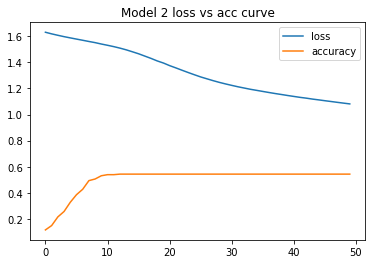

In [ ]:
# Plot loss vs acc curve for model 3
pd.DataFrame(m2_norm_history.history).plot(title="Model 2 loss vs acc curve",);

Model 3:
- epoch =500

In [ ]:
# model 3
# random seed
tf.random.set_seed(42)
# create model
m3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(5,activation="softmax")
])

# compile model
m3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(1e-3),
                metrics=['accuracy'])
# fit model
m3_norm_history = m3.fit(X_train,
                         y_train,
                         epochs=500)

Epoch 1/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6304 - accuracy: 0.1162
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6180 - accuracy: 0.1494
Epoch 3/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6071 - accuracy: 0.2158
Epoch 4/500
8/8 [==============================] - 0s 4ms/step - loss: 1.5967 - accuracy: 0.2573
Epoch 5/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5872 - accuracy: 0.3278
Epoch 6/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5780 - accuracy: 0.3859
Epoch 7/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5689 - accuracy: 0.4274
Epoch 8/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5597 - accuracy: 0.4938
Epoch 9/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5508 - accuracy: 0.5062
Epoch 10/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5402 - accuracy: 0.5311
Epoch 11/500
8/8 [===========

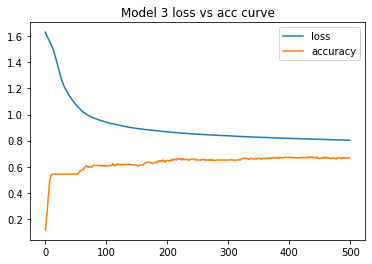

In [ ]:
# Plot loss vs acc curve for model 3
pd.DataFrame(m3_norm_history.history).plot(title="Model 3 loss vs acc curve",);

# Imporving model ideas
- Is it critical to assign labels (aka training labels and test labels per data these labels will be severity of CVD lvl 0, 1 and so on. Refer to [link](https://colab.research.google.com/drive/1E6YHzg_1YIa2K4-Bp-DZszd33g7_2I-a?authuser=1#scrollTo=OMuA2YjRMLTR) for details
- Is it beneficial to use validate data option in fitting model?


**Model 3 shows that our model is learning to classify gradually. This means:**


Potential improvement steps:
- use lr = 0.01 for Adam


If the above change improve acc, then consider below
* change metric to Confusion matrix with same set up as model 4 [ check with team]
* find ideal learning rate [ check with team]


**NOTE:If model is still underperforming consult with project team** 

### model 4:
model update
 adam's, lr = 1e-2


In [ ]:
# model 4
# random seed
tf.random.set_seed(42)
# create model
m4 = tf.keras.Sequential([
    # is there a need to define input_shape?
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),    
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(5,activation="softmax")
])

# compile model
m4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=1e-2),
                metrics=['accuracy'])
# fit model
m4_norm_history = m4.fit(X_train,
                         y_train,
                         epochs=250)

Epoch 1/250


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 1s 2ms/step - loss: 1.5499 - accuracy: 0.5104
Epoch 2/250
8/8 [==============================] - 0s 3ms/step - loss: 1.4191 - accuracy: 0.5436
Epoch 3/250
8/8 [==============================] - 0s 2ms/step - loss: 1.3223 - accuracy: 0.5436
Epoch 4/250
8/8 [==============================] - 0s 2ms/step - loss: 1.2373 - accuracy: 0.5436
Epoch 5/250
8/8 [==============================] - 0s 3ms/step - loss: 1.1622 - accuracy: 0.5436
Epoch 6/250
8/8 [==============================] - 0s 3ms/step - loss: 1.1059 - accuracy: 0.5436
Epoch 7/250
8/8 [==============================] - 0s 3ms/step - loss: 1.0595 - accuracy: 0.5436
Epoch 8/250
8/8 [==============================] - 0s 4ms/step - loss: 1.0276 - accuracy: 0.5477
Epoch 9/250
8/8 [==============================] - 0s 2ms/step - loss: 0.9990 - accuracy: 0.5851
Epoch 10/250
8/8 [==============================] - 0s 4ms/step - loss: 0.9832 - accuracy: 0.5975
Epoch 11/250
8/8 [=======================

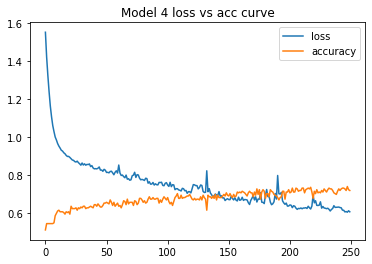

In [ ]:
# Plot loss vs acc curve for model 4
pd.DataFrame(m4_norm_history.history).plot(title="Model 4 loss vs acc curve");

In [ ]:
# whats max accuracy achieved by model_4
m4_hist_df = pd.DataFrame(m4_norm_history.history)
max_acc_ind = m4_hist_df[['accuracy']].idxmax()
m4_hist_df.iloc[max_acc_ind]


,loss,accuracy
247,0.603519,0.738589


Model 4 showed 75% acc/0.62 loss at some point but at the end it dropped to 72% acc/0.6105  loss. This means that model is overfitting.
>Potential next step of improvement:
- train model with more data
- train new model with another metric [ accuracy -> confusion matrix ] {model 5}
- find ideal learning rate **callback**


# Checking model prediction

In [ ]:
# Evaluate model3
loss, accuracy = m4.evaluate(X_test, y_test)
print(f"Model loss on test set:{loss}")
print(f"Model acc on test set:{(accuracy*100):.2f}")


2/2 [==============================] - 0s 6ms/step - loss: 1.9119 - accuracy: 0.5574
Model loss on test set:1.911892294883728
Model loss on test set:55.74


In [ ]:
# checking predictions for model 4
m4_preds = m4.predict(X_test)
m4_preds

2/2 [==============================] - 0s 6ms/step


array([[6.29297674e-01, 3.41228217e-01, 2.05485728e-02, 8.92193895e-03,
        3.57673457e-06],
       [1.76362321e-01, 6.88973248e-01, 1.13023287e-02, 1.23192333e-01,
        1.69744671e-04],
       [6.75745249e-01, 3.20286065e-01, 8.11610662e-05, 3.88747314e-03,
        1.41262635e-09],
       [4.14458252e-02, 2.90712118e-01, 3.87273341e-01, 1.58886135e-01,
        1.21682614e-01],
       [9.94613290e-01, 5.38637675e-03, 9.23614463e-10, 2.60211436e-07,
        1.66960364e-20],
       [6.84186399e-01, 2.77047217e-01, 3.29971313e-02, 5.76571142e-03,
        3.54321264e-06],
       [3.11467556e-05, 4.65236560e-09, 5.81313491e-01, 4.18655276e-01,
        5.50652546e-09],
       [6.29701049e-07, 2.64756858e-13, 6.66293740e-01, 3.33705574e-01,
        4.38679475e-13],
       [9.85115111e-01, 1.03612104e-02, 4.51826164e-03, 5.43387932e-06,
        8.59426627e-11],
       [9.99921501e-01, 6.56315024e-05, 1.27865733e-05, 1.52745872e-10,
        5.76976727e-19],
       [9.95136681e-04, 2.8529

In [ ]:
# converting m4 predition probablities into correct format
m4_preds = m4_preds.argmax(axis=1)
m4_preds
# y_preds = y_probs.argmax(axis=1)

array([0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0,
       2, 1, 0, 1, 2, 1, 0, 3, 3, 0, 0, 3, 1, 0, 1, 0, 0])

ValueError: ignored

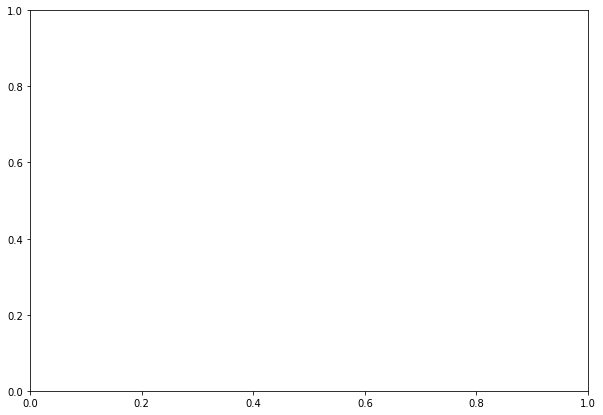

In [ ]:
# visualizing train and test data
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="Training data")
plt.scatter(X_test,y_test,c="y",label="Test data")
plt.legend();

In [ ]:
X_test.shape, y_test.shape, y_pred.shape

((61, 13), (61, 5), (302, 5))

In [ ]:
# checking prediction for model4
m4

In [ ]:
# plot model's prediction
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train,c="b",label="training data")
plt.scatter(X_test, y_test,c="g",label="test data")
plt.scatter(X_test, y_pred,c="r",label="Predictions")
plt.legend();

# Model after improvements

- as there are 13 features, input layer shape would be (302,5) [ 5 classes = lvl 0{no CVD}, lvl 1, lvl 2, lvl 3 and lvl 4 ]
- discuss with project team how to assing label to classes?
- determine input shape: 
- output shape: 5 ( 1 per severity)

## check model 4 input and output shape
https://colab.research.google.com/drive/1juErbYqp55wOswDHxKdATBRIoLe2_9hF#scrollTo=UrWWaNTvT-Mq&line=1&uniqifier=1

In [ ]:
# finding input shape
X_train.shape

(241, 13)

In [ ]:
y_train.shape

(241, 5)

Model 5:
- hidden layer 3
- hidden units = 4 -> 13

In [ ]:
X[0:5,:]

array([[0.79166667, 1.        , 1.        , 0.62264151, 0.3652968 ,
        0.        , 1.        , 0.28244275, 1.        , 0.24193548,
        0.5       , 1.        , 0.        ],
       [0.79166667, 1.        , 1.        , 0.24528302, 0.23515982,
        0.        , 1.        , 0.44274809, 1.        , 0.41935484,
        0.5       , 0.66666667, 1.        ],
       [0.16666667, 1.        , 0.66666667, 0.33962264, 0.28310502,
        0.        , 0.        , 0.88549618, 0.        , 0.56451613,
        1.        , 0.        , 0.        ],
       [0.25      , 0.        , 0.33333333, 0.33962264, 0.17808219,
        0.        , 1.        , 0.77099237, 0.        , 0.22580645,
        0.        , 0.        , 0.        ],
       [0.5625    , 1.        , 0.33333333, 0.24528302, 0.25114155,
        0.        , 0.        , 0.81679389, 0.        , 0.12903226,
        0.        , 0.        , 0.        ]])

Discuss model 5 with Project team:
- reason: `y_pred = ohe.fit_transform()` and `train_test_split` might be reason for error
- In model 5, steps to create test and train data is different [ this is irrelevant no impact on model performance]

## model 5


In [ ]:
# cleveland data only
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# reading data
cln_cvd_patient_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",sep=',')
cln_cvd_patient_data.columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","CVDriskindicator"]


In [ ]:
# find and drop index for '?' records
thal_invalid_data = cln_cvd_patient_data.index[cln_cvd_patient_data['thal']=='?'].tolist()
ca_invalid_data = cln_cvd_patient_data.index[cln_cvd_patient_data['ca']=='?'].tolist()
cln_cvd_patient_data.drop(index=ca_invalid_data,inplace=True)
cln_cvd_patient_data.drop(index=thal_invalid_data,inplace=True)
ca_invalid_data, thal_invalid_data

([165, 191, 286, 301], [86, 265])

In [ ]:
# validation check
cln_cvd_patient_data.index[cln_cvd_patient_data['thal']=='?'].tolist()

[]

In [ ]:
cln_cvd_patient_data.shape

(296, 14)

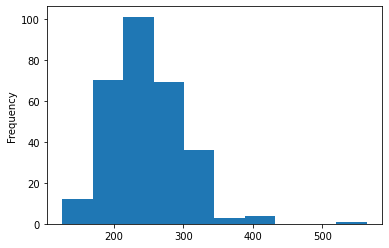

In [ ]:
# visualizng predictor variable 
cln_cvd_patient_data["chol"].plot(kind="hist")

In [ ]:
# visualizng predictor variable 
cln_cvd_patient_data["chol"].plot(kind="hist")

In [ ]:
# dataframe datatype check
cln_cvd_patient_data.dtypes


age                 float64
sex                 float64
cp                  float64
trestbps            float64
chol                float64
fbs                 float64
restecg             float64
thalach             float64
exang               float64
oldpeak             float64
slope               float64
ca                   object
thal                 object
CVDriskindicator      int64
dtype: object

In [ ]:
# fix format for heatmap
hmap_cvd_patient_data = cln_cvd_patient_data
hmap_cvd_patient_data[['ca','thal']] = cvd_patient_data[['thal','ca']].astype(np.float32)
hmap_cvd_patient_data.dtypes

age                 float64
sex                 float64
cp                  float64
trestbps            float64
chol                float64
fbs                 float64
restecg             float64
thalach             float64
exang               float64
oldpeak             float64
slope               float64
ca                  float32
thal                float32
CVDriskindicator      int64
dtype: object

In [ ]:
# buidling correct df for EDA
hm_cvd_patient_data = hmap_cvd_patient_data[['cp','fbs','restecg','exang','oldpeak','ca','thal']]
hm_cvd_patient_data

,cp,fbs,restecg,exang,oldpeak,ca,thal
0,4.0,0.0,2.0,1.0,1.5,3.0,3.0
1,4.0,0.0,2.0,1.0,2.6,7.0,2.0
2,3.0,0.0,0.0,0.0,3.5,3.0,0.0
3,2.0,0.0,2.0,0.0,1.4,3.0,0.0
4,2.0,0.0,0.0,0.0,0.8,3.0,0.0
...,...,...,...,...,...,...,...
296,4.0,0.0,0.0,1.0,0.2,7.0,0.0
297,1.0,0.0,0.0,0.0,1.2,7.0,0.0
298,4.0,1.0,0.0,0.0,3.4,7.0,2.0
299,4.0,0.0,0.0,1.0,1.2,7.0,1.0


In [ ]:
hm_cvd_patient_data.iloc[:50,:]

,cp,fbs,restecg,exang,oldpeak,ca,thal
0,4.0,0.0,2.0,1.0,1.5,3.0,3.0
1,4.0,0.0,2.0,1.0,2.6,7.0,2.0
2,3.0,0.0,0.0,0.0,3.5,3.0,0.0
3,2.0,0.0,2.0,0.0,1.4,3.0,0.0
4,2.0,0.0,0.0,0.0,0.8,3.0,0.0
5,4.0,0.0,2.0,0.0,3.6,3.0,2.0
6,4.0,0.0,0.0,1.0,0.6,3.0,0.0
7,4.0,0.0,2.0,0.0,1.4,7.0,1.0
8,4.0,1.0,2.0,1.0,3.1,7.0,0.0
9,4.0,0.0,0.0,0.0,0.4,6.0,0.0


In [ ]:
hm_cvd_patient_data.shape

(296, 7)

In [ ]:
hm_cvd_patient_data.iloc[0:25,:].shape

(25, 7)

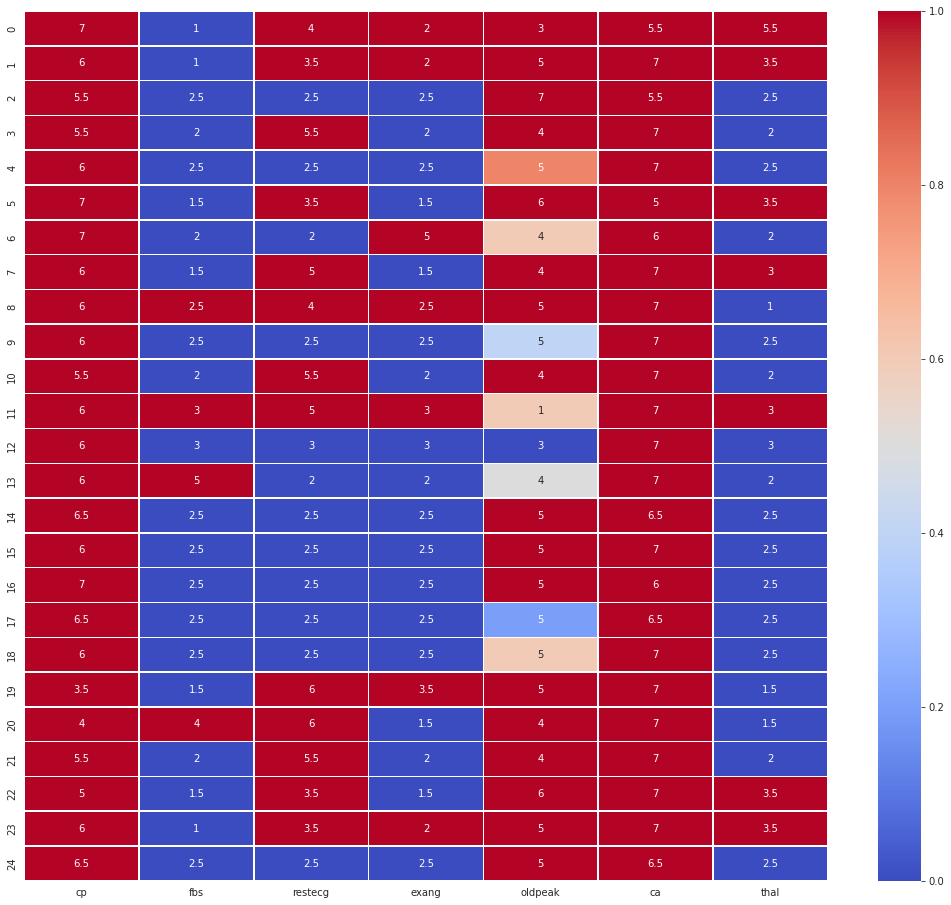

In [ ]:
from matplotlib import colorbar
# EDA
import matplotlib as plt
import seaborn as sns
with sns.axes_style("white"):

    f, ax = plt.pyplot.subplots(figsize=(18, 16))

    ax = sns.heatmap(hm_cvd_patient_data.iloc[0:25,:], annot=hm_cvd_patient_data.iloc[0:25,:].rank(axis="columns"),
                     linewidth=.5,vmin=0, vmax=1,cmap="coolwarm")



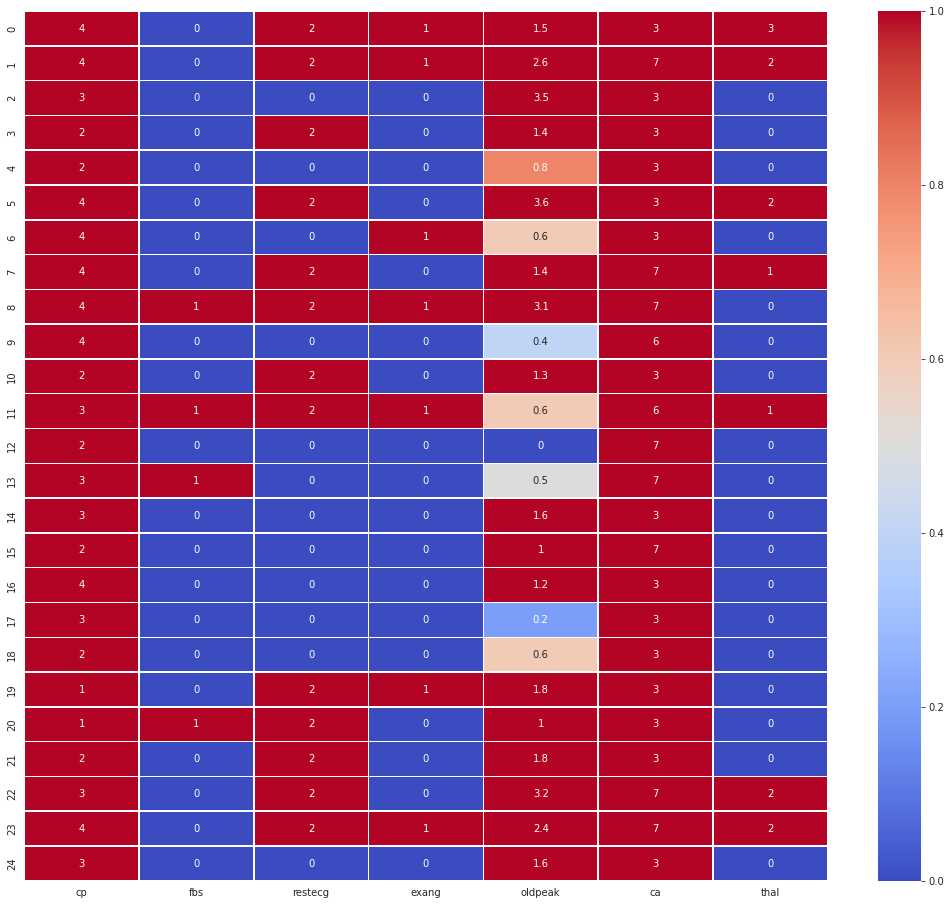

In [ ]:
from matplotlib import colorbar
# EDA
import matplotlib as plt
import seaborn as sns
with sns.axes_style("white"):

    f, ax = plt.pyplot.subplots(figsize=(18, 16))

    ax = sns.heatmap(hm_cvd_patient_data.iloc[0:25,:], annot=True,
                     linewidth=.5,vmin=0, vmax=1,cmap="coolwarm")



In [ ]:
cln_cvd_patient_data = cln_cvd_patient_data.values
cln_cvd_patient_data

array([[67.0, 1.0, 4.0, ..., '3.0', '3.0', 2],
       [67.0, 1.0, 4.0, ..., '2.0', '7.0', 1],
       [37.0, 1.0, 3.0, ..., '0.0', '3.0', 0],
       ...,
       [68.0, 1.0, 4.0, ..., '2.0', '7.0', 2],
       [57.0, 1.0, 4.0, ..., '1.0', '7.0', 3],
       [57.0, 0.0, 2.0, ..., '1.0', '3.0', 1]], dtype=object)

In [ ]:
# inspecting format
cln_cvd_patient_data.dtype

AttributeError: ignored

In [ ]:
# test 10/28
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create X and y
# Create X and y
Xm5 = cln_cvd_patient_data[:,0:13] # [all rows, cols 0th-13th]
ym5 = cln_cvd_patient_data[:,-1] # [all rows, col 14th]


#X = df.iloc[:,1:15] #independent var
#y = df['Weir']

# Create train nd test data
X_train_m5, X_test_m5, y_train_m5, y_test_m5 = train_test_split(Xm5,ym5,test_size=0.2,random_state=42)

# minmax
mnx = MinMaxScaler()
X_train_m5 = mnx.fit(X_train_m5) # it is customary to fit on training data and then use it to transform train and test data
X_train_m5 = mnx.transform(X_train_m5) 
X_test_m5 = mnx.fit_transform(X_test_m5)

# onehotencode
ohe = OneHotEncoder()
y_pred_m5 = ohe.fit_transform(y_train.reshape(-1,1)).toarray() # require 2d-array

# return type for y should be "numpy array"



*model 4 data split set up*

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create X and y
# Create X and y
X = cln_cvd_patient_data[:,0:13] # [all rows, cols 0th-13th]
y = cln_cvd_patient_data[:,-1] # [all rows, col 14th]

#X = df.iloc[:,1:15] #independent var
#y = df['Weir']

# minmax
mnx = MinMaxScaler()
X = mnx.fit_transform(X)
# onehotencode
ohe = OneHotEncoder()
y_pred = ohe.fit_transform(y.reshape(-1,1)).toarray() # require 2d-array

# return type for y should be "numpy array"

# Create train nd test data
X_train, X_test, y_train, y_test = train_test_split(X,y_pred,test_size=0.2,random_state=42)


In [ ]:
# model 5 [per suggestions from Oct 28]
# random seed
tf.random.set_seed(42)
# create model
m5 = tf.keras.Sequential([
    tf.keras.layers.Dense(48,activation="relu"), 
    tf.keras.layers.Dense(32,activation="relu"),    
    tf.keras.layers.Dense(5,activation=tf.keras.activations.softmax)
])

# compile model
m5.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=1e-2),
                metrics=['accuracy'])
# fit model
m5_norm_history = m5.fit(X_train,
                         y_train,
                         epochs=100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 1.4073 - accuracy: 0.5169
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1780 - accuracy: 0.5466
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0354 - accuracy: 0.5847
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9722 - accuracy: 0.5720
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9367 - accuracy: 0.6059
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9181 - accuracy: 0.6017
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9094 - accuracy: 0.6017
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8860 - accuracy: 0.6059
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8809 - accuracy: 0.6271
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8519 - accuracy: 0.6144
Epoch 11/100
8/8 [===========

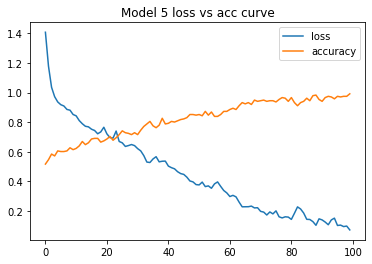

In [ ]:
# Plot loss vs acc curve for model 5
pd.DataFrame(m5_norm_history.history).plot(title="Model 5 loss vs acc curve");

In [ ]:
# whats max accuracy achieved by model_5
m5_hist_df = pd.DataFrame(m5_norm_history.history)
max_acc_ind = m5_hist_df[['accuracy']].idxmax()
m5_hist_df.iloc[max_acc_ind]


,loss,accuracy
99,0.072478,0.991525


In [ ]:
# model 5 summary
m5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 48)                672       
                                                                 
 dense_16 (Dense)            (None, 32)                1568      
                                                                 
 dense_17 (Dense)            (None, 5)                 165       
                                                                 
Total params: 2,405
Trainable params: 2,405
Non-trainable params: 0
_________________________________________________________________


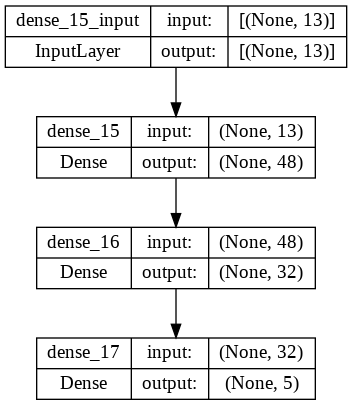

In [ ]:
# 2d version of model 5
from tensorflow.keras.utils import plot_model
plot_model(model=m5,show_shapes=True,show_layer_names=True)

### Evaulation and Prediction of model 5

In [ ]:
# evaluate model 5
loss, accuracy = m5.evaluate(X_test, y_test)
print(f"Model loss on test set:{loss}")
print(f"Model acc on test set:{(accuracy*100):.2f}")


2/2 [==============================] - 0s 6ms/step - loss: 2.8667 - accuracy: 0.6000
Model loss on test set:2.8666722774505615
Model acc on test set:60.00


- ***Model 5*** predicted accurately 60% of CVD patients on test data in compared to ***Model 4 (55%)***
- Now model is performing better on training data, lets change metric [ acc -> confusion] as we are dealing with multi-class output { Check with Project team}


[ Dec 5]
- evaluation from model 5 gave 63& which means its overfiting
- include a validation set while training
- validation set is same as test data (y_test)

In [ ]:
# checking predictions for model 5
m5_preds = m5.predict(X_test)

# converting model 5 predition probablities into correct format
m5_preds = m5_preds.argmax(axis=1)
m5_preds


2/2 [==============================] - 0s 6ms/step


array([0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       3, 2, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 3, 3, 0, 0, 1, 3, 2, 0])

In [ ]:
# inspect y_test and convert into correct format
y_test[:10]
y_test.argmax(axis=1)

array([0, 1, 0, 3, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 1, 0, 1, 3,
       3, 1, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 4, 0, 3, 0, 0, 3, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 1, 4, 3, 0])

In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix


# create confusion matrix
confusion_matrix(y_test.argmax(axis=1),m5_preds) #need to fix y_test or will give error: can't handle a mix of binary and continuous targets

array([[31,  5,  0,  0,  0],
       [ 3,  2,  1,  0,  0],
       [ 0,  3,  1,  1,  1],
       [ 1,  3,  3,  2,  0],
       [ 0,  0,  1,  2,  0]])

***Model 5*** is best perfomer with 99%acc and 7% loss.

https://tu-my.sharepoint.com/personal/qwang_towson_edu/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fqwang%5Ftowson%5Fedu%2FDocuments%2FCVD%20Risk%20Estimation%5FCode%26Report&ga=1

## Model 6

lr: 1e-3
epoch: 100
hidden layer:48,32,13

- need to check input and output shape. refer 2d diagram of m5

In [ ]:
# model 6
# metrics = acc->confusion matrix
# random seed
tf.random.set_seed(42)
# create model
m6 = tf.keras.Sequential([
    tf.keras.layers.Dense(48,activation="relu"), 
    tf.keras.layers.Dense(32,activation="relu"),    
    tf.keras.layers.Dense(13,activation="relu"),
    tf.keras.layers.Dense(5,activation=tf.keras.activations.softmax)
])

# compile model
m6.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=1e-2),
                metrics=['accuracy'])
# fit model
m6_norm_history = m6.fit(X_train,
                         y_train,
                         epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 1.4359 - accuracy: 0.4619
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 1.2316 - accuracy: 0.5212
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1023 - accuracy: 0.5212
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 1.0330 - accuracy: 0.5424
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9878 - accuracy: 0.5678
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9714 - accuracy: 0.5593
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9618 - accuracy: 0.5847
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9411 - accuracy: 0.5763
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9548 - accuracy: 0.5805
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8955 - accuracy: 0.6059
Epoch 11/100
8/8 [===========

### Model 6 performance evaluation

- To evaluate performance using other classification metrics (eg confusion matrix)
- assess predictions

In [ ]:
# evaluate model 6
loss, accuracy = m6.evaluate(X_test, y_test)
print(f"Model loss on test set:{loss}")
print(f"Model acc on test set:{(accuracy*100):.2f}")


2/2 [==============================] - 0s 5ms/step - loss: 3.2943 - accuracy: 0.5833
Model loss on test set:3.294262170791626
Model acc on test set:58.33


In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions
y_preds = model_10.predict(X_test)

# create confusion matrix
confusion_matrix(y_test,y_preds) # will give can't handle a mix of binary and continuous targets

Confusion Matrix docs:

- https://scikit-learn.org/stable/modules/model_evaluation.html#average

  ***"weighted" accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.***


# Suggestions from Project team:
> R: [Oct 28]
- delete row with '?' (<10 records) [ during pre-processing ]
- add more hidden units. # hidden layers: 3, hidden units: 48,32,13 and compare with model4 performance
- find ideal learning rate [ time dependent]


R: [Nov 22]
- using confusion metric would be appropriate.
- this will provide true positive and fp of CVD patient aka Model predicting postive and negative CVD patient

# unprocessed cleveland data
patient_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data",encoding='ISO-8859-1',) # file content are in binary format
patient_data

In [ ]:
import pandas as pd

In [ ]:
# unprocessed cleveland data
patient_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data",encoding='ISO-8859-1',) # file content are in binary format
patient_data

,1 0 63 1 -9 -9 -9
0,-9 1 145 1 233 -9 50 20
1,1 -9 1 2 2 3 81 0
2,0 0 0 0 1 10.5 6 13
3,150 60 190 90 145 85 0 0
4,2.3 3 -9 172 0 -9 -9 -9
...,...
2976,1 8
2977,-0 0 0 1 9 -9 130 80 0 130 80 0 1
2978,-9 3 1h9 1 -9 -9 -9
2979,-9 3


Advice from Dr.Ronnie:
- add cols from site [ complete]
- Look at what the predictor column means. Probably it's a multiclass or regression problem. If it is continuous value, you might need to consider it as regression problem. If not, it is a multiclass. 
> with histogram, it is non-continous so multiclass classification problem